In [188]:
import tensorflow as tf
tf.enable_eager_execution()

tf.__version__

'1.14.0'

In [189]:
AUTOTUNE=tf.data.experimental.AUTOTUNE

In [190]:
import pathlib
#help(tf.keras.utils.get_file)

data_root = '/tf/notebooks/tf_official/load_data/flower_photos'
data_root = pathlib.Path(data_root)
#help(pathlib.Path)
for item in data_root.iterdir():
    print(item)

data_root

/tf/notebooks/tf_official/load_data/flower_photos/LICENSE.txt
/tf/notebooks/tf_official/load_data/flower_photos/roses
/tf/notebooks/tf_official/load_data/flower_photos/sunflowers
/tf/notebooks/tf_official/load_data/flower_photos/dandelion
/tf/notebooks/tf_official/load_data/flower_photos/daisy
/tf/notebooks/tf_official/load_data/flower_photos/tulips


PosixPath('/tf/notebooks/tf_official/load_data/flower_photos')

In [191]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
all_image_paths
random.shuffle(all_image_paths)
#help(random.shuffle)
all_image_paths
image_count = len(all_image_paths)
image_count

3670

In [192]:
all_image_paths[:10]

['/tf/notebooks/tf_official/load_data/flower_photos/daisy/18474740346_ffdaa18032.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/daisy/19019544592_b64469bf84_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/roses/2682566502_967e7eaa2a.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/tulips/4550278535_dfdf7b74ef.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/tulips/4550091966_7f3e0f8802_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/roses/3278709893_ba4956a572_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/roses/3179751458_9646d839f6_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/2518321294_dde5aa7c20_m.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/tulips/13562271714_d534531374.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/tulips/2535936698_78cc03df3f_n.jpg']

In [193]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

attributions


{'daisy/7568630428_8cf0fc16ff_n.jpg': ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n',
 'daisy/7410356270_9dff4d0e2e_n.jpg': ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n',
 'daisy/4286053334_a75541f20b_m.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n',
 'daisy/10770585085_4742b9dac3_n.jpg': ' by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n',
 'daisy/8759177308_951790e00d_m.jpg': ' by Marina del Castell - https://www.flickr.com/photos/marinadelcastell/8759177308/\n',
 'daisy/4131565290_0585c4dd5a_n.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4131565290/\n',
 'daisy/3504430338_77d6a7fab4_n.jpg': ' by Dhilung Kirat - https://www.flickr.com/photos/dhilung/3504430338/\n',
 'daisy/3084924076_4d5c5711af_m.jpg': ' by Bùi Linh Ngân - https://www.flickr.com/photos/linhngan/3084924076/\n',
 'daisy/2642408410_61545fdc83_n.jpg': ' by D

In [194]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0)" + \
            ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

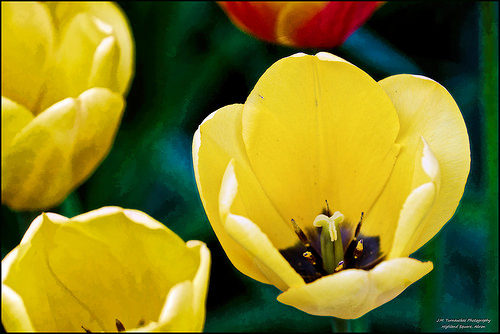

Image (CC BY 2.0) by Mark Turnauckas


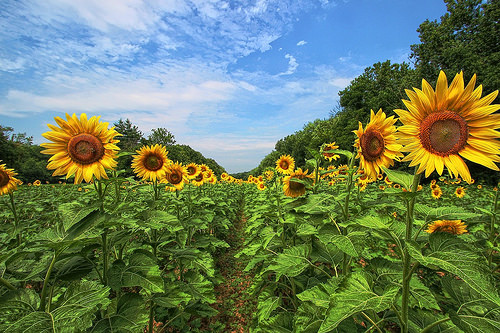

Image (CC BY 2.0) by Forsaken Fotos


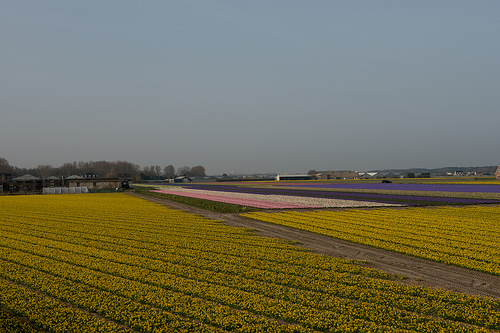

Image (CC BY 2.0) by nikontino


In [195]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))

In [196]:
label_names = sorted(item.name for item in data_root.glob('*/')
                                  if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [197]:
label_to_index = dict(
    (name, index) for index, name in enumerate(label_names)
)
label_to_index 

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [198]:
a = enumerate(label_names)
a
#help(a)

In [199]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                       for path in all_image_paths]
print('first 10 labels indices', all_image_labels[:10])

first 10 labels indices [0, 0, 2, 4, 4, 2, 2, 1, 4, 4]


In [200]:
image_path = all_image_paths[1]
print(image_path)
img_raw = tf.io.read_file(image_path)
#print(repr())
print(repr(img_raw)[:100]+'...')

img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

/tf/notebooks/tf_official/load_data/flower_photos/daisy/19019544592_b64469bf84_n.jpg
<tf.Tensor: id=549, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00...
(240, 320, 3)
<dtype: 'uint8'>


In [201]:
img_final = tf.image.resize(img_tensor,[192,192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [202]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image,[192,192])
    image /= 255.0 #normalize to [0, 1] range
    return image

In [203]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image) 

/tf/notebooks/tf_official/load_data/flower_photos/daisy/18474740346_ffdaa18032.jpg
0



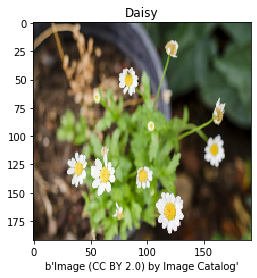

In [204]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]
print(img_path)
print(label)


plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()


In [205]:
all_image_paths
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print('shape:', repr(path_ds.output_shapes))
print('type:', repr(path_ds.output_types))
print(path_ds)


W0805 01:45:37.717031 140688792864576 deprecation.py:323] From <ipython-input-205-8267635fadbd>:3: DatasetV1.output_shapes (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
W0805 01:45:37.718736 140688792864576 deprecation.py:323] From <ipython-input-205-8267635fadbd>:4: DatasetV1.output_types (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


shape: TensorShape([])
type: tf.string
<DatasetV1Adapter shapes: (), types: tf.string>


In [206]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

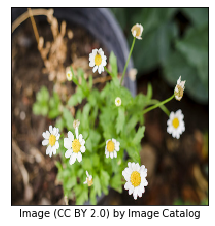

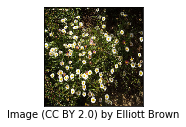

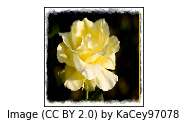

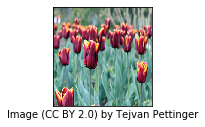

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
    plt.subplot(2, 2, n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_image_paths[n]))
    plt.show()

In [208]:
label_ds=tf.data.Dataset.from_tensor_slices(
            tf.cast(all_image_labels,tf.int64))
for label in label_ds.take(10):
    print(label_names[label.numpy()])

daisy
daisy
roses
tulips
tulips
roses
roses
dandelion
tulips
tulips


In [209]:
image_label_ds = tf.data.Dataset.zip((image_ds,label_ds))
print(image_label_ds)

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [210]:
ds = tf.data.Dataset.from_tensor_slices(
    (all_image_paths, all_image_labels))
# The tuples are unpacked into the positional arguments of the mapped
# function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [211]:
BATCH_SIZE=32
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)

#prefetch lets the dataset fetch batches, in the background
# while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [212]:
ds=image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

W0805 01:45:38.289970 140688792864576 deprecation.py:323] From <ipython-input-212-43ef8593ff18>:2: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [217]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 115s 12us/step


In [224]:
#from keras_applications import mobilenet_v2
import keras_applications
#help(mobilenet_v2.preprocess_input)
help(keras_applications.mobilenet_v2.preprocess_input)


Help on function preprocess_input in module keras_applications.mobilenet_v2:

preprocess_input(x, **kwargs)
    Preprocesses a numpy array encoding a batch of images.
    
    # Arguments
        x: a 4D numpy array consists of RGB values within [0, 255].
    
    # Returns
        Preprocessed array.



In [225]:
def change_range(image, label):
    return 2*image-1, label
keras_ds = ds.map(change_range)

In [226]:
image_batch, label_batch = next(iter(keras_ds))


<tf.Tensor: id=31152, shape=(32, 192, 192, 3), dtype=float32, numpy=
array([[[[ 0.12156868,  0.04313731, -0.02745098],
         [-0.01568627, -0.127451  , -0.11764705],
         [-0.14509803, -0.26274508, -0.27058822],
         ...,
         [-0.35490197, -0.0745098 , -0.69411767],
         [-0.4980392 , -0.23137254, -0.9098039 ],
         [-0.61176467, -0.27058822, -0.972549  ]],

        [[ 0.17965686,  0.09656858,  0.13962412],
         [-0.17551059, -0.2513889 , -0.25859886],
         [-0.22724676, -0.31213236, -0.39746732],
         ...,
         [-0.41070265, -0.13190359, -0.70565766],
         [-0.3947304 , -0.10526961, -0.73917484],
         [-0.38733655, -0.07214051, -0.70927286]],

        [[ 0.15326798,  0.10114372,  0.21029413],
         [-0.1165033 , -0.15559644, -0.16703433],
         [-0.2361111 , -0.2828431 , -0.40375817],
         ...,
         [-0.5905637 , -0.32034314, -0.8479984 ],
         [-0.5181372 , -0.20514709, -0.80196077],
         [-0.41960782, -0.15625   ,

In [227]:
label_batch

<tf.Tensor: id=31153, shape=(32,), dtype=int32, numpy=
array([4, 0, 4, 4, 0, 4, 2, 3, 0, 3, 3, 2, 1, 0, 1, 1, 2, 3, 1, 2, 4, 3,
       4, 1, 1, 2, 3, 0, 1, 1, 1, 0], dtype=int32)>

In [229]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)
help(tf.keras.layers.GlobalAveragePooling2D)

(32, 6, 6, 1280)
Help on class GlobalAveragePooling2D in module tensorflow.python.keras.layers.pooling:

class GlobalAveragePooling2D(GlobalPooling2D)
 |  Global average pooling operation for spatial data.
 |  
 |  Arguments:
 |      data_format: A string,
 |        one of `channels_last` (default) or `channels_first`.
 |        The ordering of the dimensions in the inputs.
 |        `channels_last` corresponds to inputs with shape
 |        `(batch, height, width, channels)` while `channels_first`
 |        corresponds to inputs with shape
 |        `(batch, channels, height, width)`.
 |        It defaults to the `image_data_format` value found in your
 |        Keras config file at `~/.keras/keras.json`.
 |        If you never set it, then it will be "channels_last".
 |  
 |  Input shape:
 |    - If `data_format='channels_last'`:
 |      4D tensor with shape `(batch_size, rows, cols, channels)`.
 |    - If `data_format='channels_first'`:
 |      4D tensor with shape `(batch_size, cha

In [230]:
model=tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names),activation='softmax')
])

In [232]:
logit_batch = model(image_batch).numpy()
print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print("shape:", logit_batch.shape)
logit_batch

min logit: 0.01702579
max logit: 0.718072
shape: (32, 5)


array([[0.04299986, 0.26392946, 0.28148335, 0.30758896, 0.10399835],
       [0.18109114, 0.2419454 , 0.2754462 , 0.23077327, 0.07074399],
       [0.5098249 , 0.17340653, 0.09439924, 0.20069493, 0.02167444],
       [0.08989627, 0.4288953 , 0.18159352, 0.07861143, 0.2210034 ],
       [0.17439929, 0.38927096, 0.1768315 , 0.13372189, 0.12577634],
       [0.4414419 , 0.20674446, 0.12859072, 0.1257306 , 0.09749234],
       [0.5708831 , 0.05798212, 0.29617646, 0.02781959, 0.0471387 ],
       [0.23306897, 0.5140981 , 0.04818695, 0.12371212, 0.0809339 ],
       [0.28159463, 0.2528309 , 0.20731845, 0.1873759 , 0.07088008],
       [0.13522075, 0.43662128, 0.11811936, 0.25346044, 0.0565781 ],
       [0.19755602, 0.2228367 , 0.2453412 , 0.20718785, 0.12707825],
       [0.05173947, 0.71163   , 0.10181762, 0.04555459, 0.08925827],
       [0.16045406, 0.29787955, 0.09985726, 0.15082894, 0.2909802 ],
       [0.35390055, 0.1475353 , 0.16970806, 0.15519834, 0.17365776],
       [0.23482606, 0.15605994, 0.

In [233]:
model.compile(optimizer=tf.train.AdamOptimizer(),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

In [234]:
len(model.trainable_variables)

2

In [235]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [236]:
steps_per_epoch=tf.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [237]:
model.fit(ds, epochs=1, steps_per_epoch=3)

W0805 02:59:11.300320 140688792864576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


3/3 [==============================] - 13s 4s/step - loss: 1.8292 - acc: 0.1771


In [238]:
import time

def timeit(ds, batches=2*steps_per_epoch+1):
    overall_start = time.time()
    it = iter(ds.take(batches+1))
    next(it)
    
    start = time.time()
    for i,(images,labels) in enumerate(it):
        if i%10 == 0:
            print('.',end='')
    print()
    end=time.time()
    
    duration=end-start
    print("{} batches: {} s".format(batches,duration))
    print("{:0.5f} Images/s".format(BATCH_SIZE*batches/duration))
    print("Total time:{}s".format(end-overall_start))

In [246]:
ds = image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))

ds=ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [240]:
timeit(ds)

........................
231.0 batches: 19.11964702606201 s
386.61802 Images/s
Total time:28.2443790435791s


In [247]:
timeit(ds)

........................
231.0 batches: 20.16092324256897 s
366.64988 Images/s
Total time:29.271005392074585s


In [242]:
ds = image_label_ds.cache()
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(
        buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [243]:
timeit(ds)

........................
231.0 batches: 0.6881732940673828 s
10741.48047 Images/s
Total time:9.627412557601929s


In [245]:
timeit(ds)


........................
231.0 batches: 0.8098759651184082 s
9127.32359 Images/s
Total time:10.341214895248413s


In [249]:
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).\
            map(tf.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)

In [251]:
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)
image_ds

<DatasetV1Adapter shapes: (192, 192, 3), types: tf.float32>

In [252]:
ds=tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int64)>

In [253]:
timeit(ds)

........................
231.0 batches: 19.31134605407715 s
382.78015 Images/s
Total time:28.47053027153015s


In [256]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = path_ds.map(load_and_preprocess_image)
image_ds

<DatasetV1Adapter shapes: (192, 192, 3), types: tf.float32>

In [257]:
ds = image_ds.map(tf.serialize_tensor)
ds

<DatasetV1Adapter shapes: (), types: tf.string>

In [258]:
tfrec=tf.data.experimental.TFRecordWriter('images_2.tfrec')
tfrec.write(ds)

In [265]:
ds=tf.data.TFRecordDataset('images_2.tfrec')

def parse(x):
    result = tf.parse_tensor(x, out_type=tf.float32)
    result = tf.reshape(result,[192,192,3])
    return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<DatasetV1Adapter shapes: (192, 192, 3), types: tf.float32>

In [266]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int64)>

In [267]:
timeit(ds)

........................
231.0 batches: 2.0844922065734863 s
3546.18740 Images/s
Total time:3.049596071243286s
